In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 98% !important }<style>"))

# Analysis

In [2]:
from utilities import *
from models import *

In [3]:
pin_file = "../Data/pin.csv"

pin = read_pin(pin_file)

In [4]:
testPin_file = "../Data/testPin.csv"

testPin = read_pin(testPin_file)

In [5]:
filename = "../Data/rssi5.csv"
B1 = "0117C55D14E4"

data = read_data(filename, B1)

All beacons: ['0117C55D14E4']
Selecting 0117C55D14E4


In [6]:
data[scanners] = min_max_scaling(data[scanners])

In [7]:
data.describe()

C400A2E19293  CD4533FFC0E1  D2B6503554D7  DB8B36A69C56  DD697EA75B68  \
count   3219.000000   3140.000000   2388.000000   3396.000000   3168.000000   
mean       0.438490      0.402463      0.354355      0.426232      0.437463   
std        0.151902      0.130322      0.120450      0.142455      0.114273   
min        0.050000      0.033333      0.050000      0.033333      0.050000   
25%        0.333333      0.300000      0.266667      0.329167      0.366667   
50%        0.466667      0.416667      0.350000      0.416667      0.450000   
75%        0.533333      0.516667      0.450000      0.550000      0.533333   
max        0.733333      0.616667      0.600000      0.700000      0.683333   

       DF231643E227  E13B805C6CB0  E43355CA8B96  E6D9D20DD197  E8FD0B453DC4  \
count   3347.000000   3461.000000   3819.000000   4928.000000   2340.000000   
mean       0.425197      0.421501      0.427935      0.419207      0.368105   
std        0.156658      0.155481      0.146579      0.196955      0.179789   
min        0.033333      0.050000      0.050000      0.033333      0.033333   
25%        0.300000      0.283333      0.300000      0.283333      0.216667   
50%        0.450000      0.416667      0.450000      0.416667      0.333333   
75%        0.550000      0.550000      0.550000      0.516667      0.533333   
max        0.750000      0.783333      0.650000      0.850000      0.700000   

       E96AF2C858BA  EC72840D9AD3  F1307ECB3B90  F1EDAF28E08A  F69A86823B96  \
count   3180.000000   3074.000000   3378.000000   3859.000000   3303.000000   
mean       0.387825      0.468933      0.499724      0.372234      0.420169   
std        0.184707      0.130727      0.130346      0.153890      0.143028   
min        0.033333      0.066667      0.066667      0.033333      0.033333   
25%        0.216667      0.383333      0.416667      0.216667      0.316667   
50%        0.400000      0.466667      0.500000      0.416667      0.416667   
75%        0.550000      0.550000      0.600000      0.516667      0.516667   
max        0.800000      0.750000      0.766667      0.633333      0.733333   

       FB2EE01C18CE  FDAE5980F28C  
count   2179.000000   3539.000000  
mean       0.296665      0.402562  
std        0.135034      0.135141  
min        0.033333      0.033333  
25%        0.183333      0.300000  
50%        0.283333      0.416667  
75%        0.416667      0.516667  
max        0.566667      0.666667

In [8]:
data

time location  C400A2E19293  CD4533FFC0E1  \
0     2019-12-02 01:05:32.956    V1_32           NaN           NaN   
1     2019-12-02 01:05:32.976    V1_32           NaN           NaN   
2     2019-12-02 01:05:33.015    V1_32           NaN           NaN   
3     2019-12-02 01:05:33.034    V1_32           NaN           NaN   
4     2019-12-02 01:05:33.096    V1_32           NaN           NaN   
...                       ...      ...           ...           ...   
49658 2019-12-12 01:47:54.481    V1_26      0.516667           NaN   
49659 2019-12-12 01:47:54.683    V1_26           NaN           NaN   
49660 2019-12-12 01:47:54.736    V1_26           NaN           NaN   
49661 2019-12-12 01:47:54.772    V1_26           NaN           NaN   
49662 2019-12-12 01:47:54.796    V1_26           NaN           NaN   

       D2B6503554D7  DB8B36A69C56  DD697EA75B68  DF231643E227  E13B805C6CB0  \
0               NaN           NaN           NaN           NaN           NaN   
1               NaN           NaN           NaN           NaN           NaN   
2               NaN           NaN           NaN           NaN           NaN   
3               NaN           NaN           NaN           NaN           NaN   
4               NaN           NaN           NaN           NaN           NaN   
...             ...           ...           ...           ...           ...   
49658           NaN           NaN           NaN           NaN           NaN   
49659           NaN      0.383333           NaN           NaN           NaN   
49660           NaN           NaN           NaN           NaN           NaN   
49661           NaN           NaN           NaN           NaN           NaN   
49662      0.383333           NaN           NaN           NaN           NaN   

       E43355CA8B96  E6D9D20DD197  E8FD0B453DC4  E96AF2C858BA  EC72840D9AD3  \
0          0.066667           NaN           NaN           NaN           NaN   
1               NaN           NaN           NaN           NaN           NaN   
2               NaN      0.466667           NaN           NaN           NaN   
3               NaN           NaN           NaN           NaN           NaN   
4               NaN           NaN           NaN           NaN           NaN   
...             ...           ...           ...           ...           ...   
49658           NaN           NaN           NaN           NaN           NaN   
49659           NaN           NaN           NaN           NaN           NaN   
49660           NaN           NaN      0.683333           NaN           NaN   
49661           NaN           NaN           NaN           NaN           NaN   
49662           NaN           NaN           NaN           NaN           NaN   

       F1307ECB3B90  F1EDAF28E08A  F69A86823B96  FB2EE01C18CE  FDAE5980F28C  
0               NaN           NaN           NaN           NaN           NaN  
1          0.300000           NaN           NaN           NaN           NaN  
2               NaN           NaN           NaN           NaN           NaN  
3          0.350000           NaN           NaN           NaN           NaN  
4               NaN           NaN           NaN      0.533333           NaN  
...             ...           ...           ...           ...           ...  
49658           NaN           NaN           NaN           NaN           NaN  
49659           NaN           NaN           NaN           NaN           NaN  
49660           NaN           NaN           NaN           NaN           NaN  
49661      0.266667           NaN           NaN           NaN           NaN  
49662           NaN           NaN           NaN           NaN           NaN  

[49663 rows x 19 columns]

In [9]:
testFilename = "../Data/testRssi.csv"
B1 = "0117C55D14E4"

test = read_data(testFilename, B1)

All beacons: ['0117C55D14E4']
Selecting 0117C55D14E4


In [10]:
test

time location  C400A2E19293  CD4533FFC0E1  \
0    2019-12-13 02:15:14.272     T1_1           NaN         -75.0   
1    2019-12-13 02:15:14.362     T1_1           NaN           NaN   
2    2019-12-13 02:15:14.368     T1_1           NaN           NaN   
3    2019-12-13 02:15:14.392     T1_1           NaN           NaN   
4    2019-12-13 02:15:14.439     T1_1           NaN           NaN   
...                      ...      ...           ...           ...   
8453 2019-12-13 03:20:19.283    T1_16           NaN           NaN   
8454 2019-12-13 03:20:19.287    T1_16           NaN           NaN   
8455 2019-12-13 03:20:19.383    T1_16           NaN           NaN   
8456 2019-12-13 03:20:19.402    T1_16         -66.0           NaN   
8457 2019-12-13 03:20:19.693    T1_16           NaN           NaN   

      D2B6503554D7  DB8B36A69C56  DD697EA75B68  DF231643E227  E13B805C6CB0  \
0              NaN           NaN           NaN           NaN           NaN   
1              NaN           NaN           NaN           NaN           NaN   
2              NaN           NaN           NaN           NaN           NaN   
3              NaN           NaN           NaN           NaN           NaN   
4              NaN           NaN           NaN           NaN           NaN   
...            ...           ...           ...           ...           ...   
8453           NaN           NaN           NaN           NaN           NaN   
8454           NaN           NaN           NaN           NaN           NaN   
8455           NaN           NaN           NaN           NaN           NaN   
8456           NaN           NaN           NaN           NaN           NaN   
8457           NaN           NaN           NaN           NaN           NaN   

      E43355CA8B96  E6D9D20DD197  E8FD0B453DC4  E96AF2C858BA  EC72840D9AD3  \
0              NaN           NaN           NaN           NaN           NaN   
1              NaN         -68.0           NaN           NaN           NaN   
2              NaN           NaN           NaN           NaN           NaN   
3              NaN           NaN           NaN         -68.0           NaN   
4              NaN           NaN           NaN         -66.0           NaN   
...            ...           ...           ...           ...           ...   
8453           NaN           NaN           NaN           NaN           NaN   
8454         -82.0           NaN           NaN         -89.0           NaN   
8455           NaN           NaN           NaN           NaN           NaN   
8456           NaN           NaN           NaN           NaN           NaN   
8457           NaN           NaN           NaN           NaN           NaN   

      F1307ECB3B90  F1EDAF28E08A  F69A86823B96  FB2EE01C18CE  FDAE5980F28C  
0              NaN           NaN           NaN           NaN           NaN  
1              NaN           NaN           NaN           NaN           NaN  
2              NaN           NaN           NaN         -84.0           NaN  
3              NaN           NaN           NaN           NaN           NaN  
4              NaN           NaN           NaN           NaN           NaN  
...            ...           ...           ...           ...           ...  
8453           NaN         -75.0           NaN           NaN           NaN  
8454           NaN           NaN           NaN           NaN           NaN  
8455           NaN         -70.0           NaN           NaN           NaN  
8456           NaN           NaN           NaN           NaN           NaN  
8457           NaN         -75.0           NaN           NaN           NaN  

[8458 rows x 19 columns]

In [11]:
test[scanners] = min_max_scaling(test[scanners])

In [12]:
test.describe()

C400A2E19293  CD4533FFC0E1  D2B6503554D7  DB8B36A69C56  DD697EA75B68  \
count    532.000000    599.000000    480.000000    575.000000    547.000000   
mean       0.453039      0.373011      0.375104      0.381507      0.453230   
std        0.171712      0.122397      0.117876      0.119178      0.130953   
min        0.100000      0.066667      0.066667      0.033333      0.050000   
25%        0.300000      0.283333      0.300000      0.300000      0.383333   
50%        0.466667      0.383333      0.383333      0.400000      0.433333   
75%        0.566667      0.466667      0.466667      0.466667      0.583333   
max        0.750000      0.616667      0.600000      0.633333      0.683333   

       DF231643E227  E13B805C6CB0  E43355CA8B96  E6D9D20DD197  E8FD0B453DC4  \
count    586.000000    614.000000    585.000000    652.000000    349.000000   
mean       0.476877      0.431162      0.424957      0.336554      0.355014   
std        0.171551      0.133564      0.155576      0.142083      0.163073   
min        0.050000      0.033333      0.033333      0.050000      0.050000   
25%        0.333333      0.333333      0.300000      0.216667      0.216667   
50%        0.466667      0.483333      0.450000      0.316667      0.383333   
75%        0.583333      0.550000      0.566667      0.466667      0.483333   
max        0.816667      0.633333      0.633333      0.566667      0.633333   

       E96AF2C858BA  EC72840D9AD3  F1307ECB3B90  F1EDAF28E08A  F69A86823B96  \
count    651.000000    581.000000    605.000000    642.000000    605.000000   
mean       0.383948      0.437235      0.460331      0.382061      0.347824   
std        0.149436      0.144454      0.130634      0.185832      0.140548   
min        0.050000      0.116667      0.066667      0.033333      0.033333   
25%        0.266667      0.333333      0.383333      0.200000      0.216667   
50%        0.416667      0.416667      0.466667      0.416667      0.383333   
75%        0.516667      0.516667      0.533333      0.566667      0.450000   
max        0.583333      0.750000      0.733333      0.616667      0.600000   

       FB2EE01C18CE  FDAE5980F28C  
count    433.000000    511.000000  
mean       0.283834      0.386595  
std        0.116779      0.111174  
min        0.066667      0.050000  
25%        0.183333      0.316667  
50%        0.283333      0.400000  
75%        0.350000      0.483333  
max        0.516667      0.666667

## Train Validation Split

In [13]:
train, validation = train_validation_split(data)

In [14]:
train.groupby("location")[scanners].count()

C400A2E19293  CD4533FFC0E1  D2B6503554D7  DB8B36A69C56  \
location                                                           
V1_10              281           151           102           258   
V1_11               62            84           102           125   
V1_12               91           100            71           123   
V1_13               88           176            65           146   
V1_14               43           200            63           107   
V1_18               81            30            61           113   
V1_19              381           123           114           195   
V1_20              139           140           124           102   
V1_21               88           183           100            98   
V1_22               80           101            79            89   
V1_23               75           110            81            64   
V1_24               30            84            71            77   
V1_26              202            68            84           113   
V1_27              204           143           146           179   
V1_28              112           123           130            76   
V1_29               77           166           122            79   
V1_30               42           110            82            47   
V1_31               23            80            48            91   
V1_32               38           111            86            80   
V1_8               151            98            83           228   
V1_9               240           146           107           299   

          DD697EA75B68  DF231643E227  E13B805C6CB0  E43355CA8B96  \
location                                                           
V1_10              232            95            98           339   
V1_11              149           104            83           122   
V1_12              104           105            72            72   
V1_13               57           115           136           146   
V1_14               77           117           342            84   
V1_18               59            45            35           292   
V1_19              316           107            75           403   
V1_20              152           112            85           104   
V1_21              126           118           162            68   
V1_22               84           206           260            37   
V1_23               52           266           166            68   
V1_24               58           138           126            56   
V1_26               80            30            83            72   
V1_27              191           114            91           220   
V1_28              155           101           120            79   
V1_29              117           104           194            84   
V1_30               84           279           244            38   
V1_31               56           141           116            35   
V1_32               93           186           153            51   
V1_8                93            99            85           350   
V1_9               175            93            58           374   

          E6D9D20DD197  E8FD0B453DC4  E96AF2C858BA  EC72840D9AD3  \
location                                                           
V1_10                0           213           123           161   
V1_11              153            62            72           174   
V1_12              207            63            91           199   
V1_13              324            18            53           144   
V1_14              266            19           137            63   
V1_18                3            93            49            75   
V1_19               51           178            62           185   
V1_20              108            46            84           116   
V1_21              187            28           120           122   
V1_22              304            35           186            81   
V1_23              421            41           248            73

In [15]:
train.shape

(39730, 19)

In [16]:
validation.shape

(9933, 19)

In [17]:
train.sort_values("time", inplace=True)
validation.sort_values("time", inplace=True)
test.sort_values("time", inplace=True)

In [18]:
train_rolled = train.groupby("location").rolling(30, min_periods=1).mean().reset_index()
validation_rolled = validation.groupby("location").rolling(30, min_periods=1).mean().reset_index()
test_rolled = test.groupby("location").rolling(30, min_periods=1).mean().reset_index()

In [19]:
train_rolled

location  level_1  C400A2E19293  CD4533FFC0E1  D2B6503554D7  \
0        V1_10    30171           NaN           NaN           NaN   
1        V1_10    30172           NaN           NaN           NaN   
2        V1_10    30173      0.533333           NaN           NaN   
3        V1_10    30176      0.533333           NaN           NaN   
4        V1_10    30177      0.533333           NaN           NaN   
...        ...      ...           ...           ...           ...   
39725     V1_9    43166      0.433333           NaN      0.366667   
39726     V1_9    43167      0.433333           NaN      0.366667   
39727     V1_9    43168      0.433333           NaN      0.366667   
39728     V1_9    43169      0.433333           NaN      0.366667   
39729     V1_9    43170      0.433333           NaN      0.366667   

       DB8B36A69C56  DD697EA75B68  DF231643E227  E13B805C6CB0  E43355CA8B96  \
0               NaN           NaN           NaN           NaN           NaN   
1               NaN           NaN           NaN           0.3           NaN   
2               NaN           NaN           NaN           0.3           NaN   
3               NaN           NaN           NaN           0.3           NaN   
4               NaN           NaN           NaN           0.3           NaN   
...             ...           ...           ...           ...           ...   
39725      0.606667      0.483333           NaN           NaN      0.622222   
39726      0.606667      0.483333           NaN           NaN      0.622222   
39727      0.606667      0.483333           NaN           NaN      0.622222   
39728      0.606667      0.483333           NaN           NaN      0.620833   
39729      0.606667      0.483333           NaN           NaN      0.620833   

       E6D9D20DD197  E8FD0B453DC4  E96AF2C858BA  EC72840D9AD3  F1307ECB3B90  \
0               NaN           NaN      0.183333           NaN           NaN   
1               NaN           NaN      0.183333           NaN           NaN   
2               NaN           NaN      0.183333           NaN           NaN   
3               NaN           NaN      0.183333           NaN      0.583333   
4               NaN           NaN      0.183333           NaN      0.575000   
...             ...           ...           ...           ...           ...   
39725           NaN      0.183333      0.183333      0.558333      0.400000   
39726           NaN      0.183333      0.183333      0.558333      0.400000   
39727           NaN      0.183333      0.183333      0.558333      0.422222   
39728           NaN      0.183333      0.183333      0.558333      0.422222   
39729           NaN      0.183333      0.183333      0.561111      0.422222   

       F1EDAF28E08A  F69A86823B96  FB2EE01C18CE  FDAE5980F28C  
0               NaN           NaN           NaN           NaN  
1               NaN           NaN           NaN           NaN  
2               NaN           NaN           NaN           NaN  
3               NaN           NaN           NaN      0.450000  
4               NaN           NaN           NaN      0.450000  
...             ...           ...           ...           ...  
39725         0.475           0.4      0.133333      0.416667  
39726         0.475           0.4      0.125000      0.416667  
39727         0.475           0.4      0.125000      0.416667  
39728         0.475           0.4      0.125000      0.416667  
39729         0.475           0.4      0.125000           NaN  

[39730 rows x 19 columns]

## Imputation
1. Forward fill
2. Fill NaN

In [20]:
train_imputed = train_rolled.set_index("location").groupby("location").ffill()
train_imputed.fillna(0, inplace=True)
train_imputed.reset_index(inplace=True)

In [21]:
validation_imputed = validation_rolled.set_index("location").groupby("location").ffill()
validation_imputed.fillna(0, inplace=True)
validation_imputed.reset_index(inplace=True)

In [22]:
test_imputed = test_rolled.set_index("location").groupby("location").ffill()
test_imputed.fillna(0, inplace=True)
test_imputed.reset_index(inplace=True)

## Change Location to Coordinates

In [23]:
train_imputed["X"] = train_imputed["location"].apply(lambda x: pin[x]["X"])
train_imputed["Y"] = train_imputed["location"].apply(lambda x: pin[x]["Y"])

In [24]:
validation_imputed["X"] = validation_imputed["location"].apply(lambda x: pin[x]["X"])
validation_imputed["Y"] = validation_imputed["location"].apply(lambda x: pin[x]["Y"])

In [25]:
test_imputed["X"] = test_imputed["location"].apply(lambda x: testPin[x]["X"])
test_imputed["Y"] = test_imputed["location"].apply(lambda x: testPin[x]["Y"])

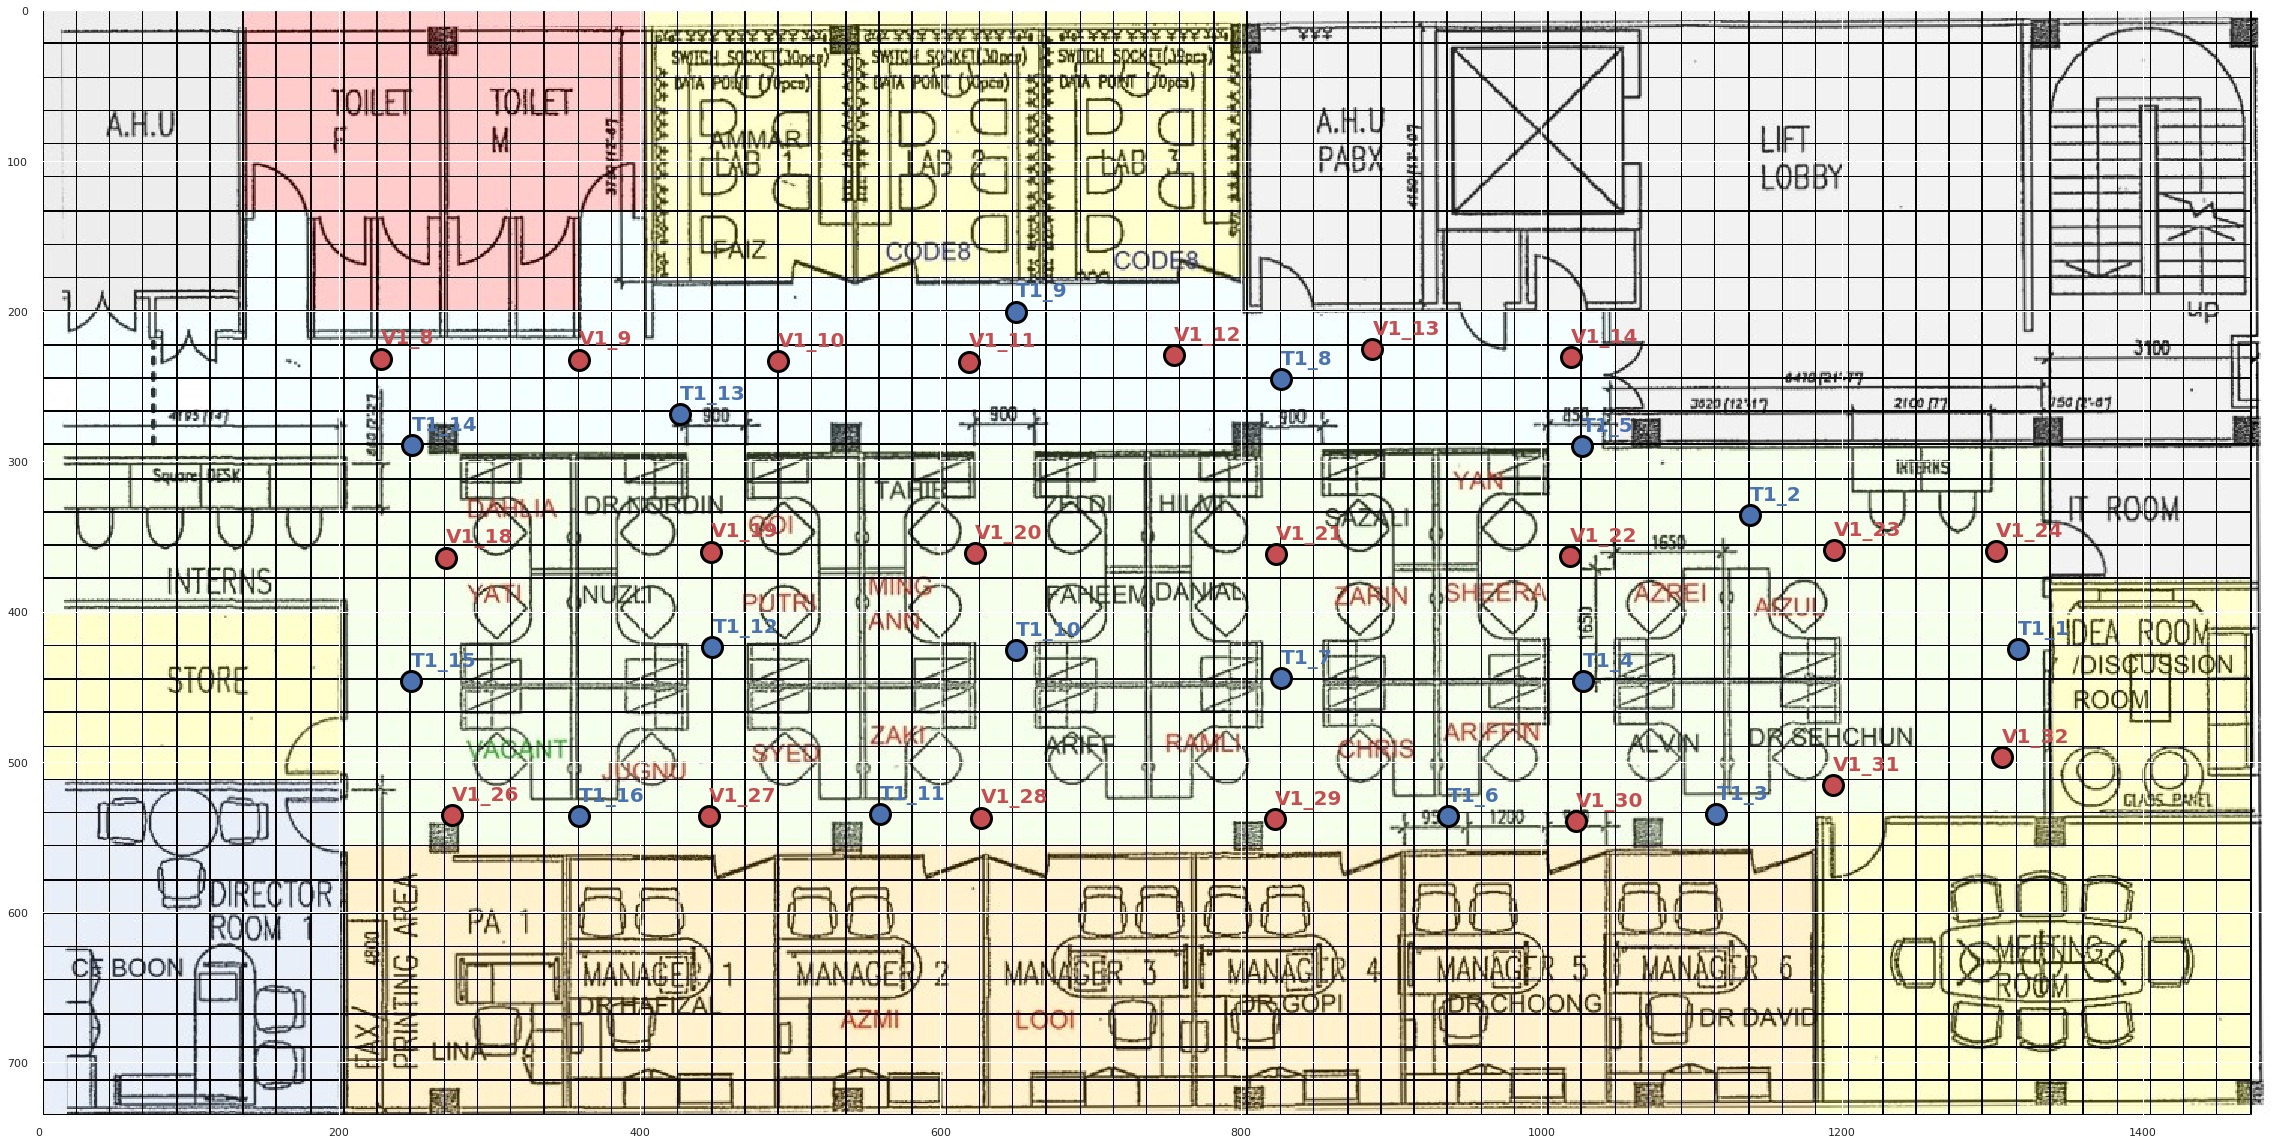

In [26]:
img =  mpimg.imread('../Map/main.png')
fingerprint_color = "r"
testdata_color = "b"
plt.figure(figsize=(40,40))
plt.imshow(img)

labels = ["V1_23", "V1_24", "V1_32", "V1_22", "V1_14", "V1_13", "V1_12", "V1_21", "V1_29", "V1_30", "V1_31", "V1_11", "V1_20", "V1_28", "V1_10", "V1_19", "V1_27", "V1_9", "V1_8", "V1_18", "V1_26"]
x = [27.151600, 29.594400, 29.689400, 23.153700, 23.169100, 20.171700, 17.173201, 18.712299, 18.691700, 23.244200, 27.133301, 14.063600, 14.159800, 14.250300, 11.176600, 10.162500, 10.141900, 8.178670, 5.180690, 6.164600, 6.255650]
y = [8.159480, 8.172020, 11.286000, 8.250140, 5.247920, 5.121330, 5.217130, 8.227330, 12.230300, 12.253700, 11.717700, 5.312350, 8.203950, 12.207500, 5.297530, 8.183420, 12.186400, 5.282130, 5.266730, 8.274090, 12.166400]
x = np.array(x) * 44
y = np.array(y) * 44

testLabels = ["T1_1", "T1_2", "T1_3", "T1_4", "T1_5", "T1_6", "T1_7", "T1_8", "T1_9", "T1_10", "T1_11", "T1_12", "T1_13", "T1_14", "T1_15", "T1_16"]
testX = [29.934250, 25.877805, 25.372470, 23.355726, 23.333564, 21.316819, 18.790348, 18.790348, 14.779021, 14.779021, 12.717952, 10.191480, 9.703916, 5.648265, 5.626103, 8.174736]
testY = [9.659024, 7.630801, 12.155781, 10.139037, 6.593112, 12.177943, 10.094712, 5.573659, 4.554205, 9.673634, 12.155781, 9.629310, 6.105547, 6.570950, 10.139037, 12.177943]
testX = np.array(testX) * 44
testY = np.array(testY) * 44

plt.scatter(x, y, s=400, c=fingerprint_color, edgecolors="black", linewidths=3)
plt.scatter(testX, testY, s=400, c=testdata_color, edgecolors="black", linewidths=3)

for i in range(len(labels)):
    plt.annotate(labels[i], (x[i], y[i] - 10), fontsize=20, color=fingerprint_color, weight='bold')

for j in range(len(testLabels)):
    plt.annotate(testLabels[j], (testX[j], testY[j] - 10), fontsize=20, color=testdata_color, weight='bold')

In [27]:
def generate_between(data, A, B):
    A_data = data[data['location'] == A]
    B_data = data[data['location'] == B]
    l = min(A_data.shape[0], B_data.shape[0])
    A_sliced = A_data.iloc[:l, :][scanners + ['X', 'Y']].reset_index(drop=True)
    B_sliced = B_data.iloc[:l, :][scanners + ['X', 'Y']].reset_index(drop=True)
    return (A_sliced + B_sliced) / 2

In [28]:
L1_24_32 = generate_between(train_imputed, 'V1_24', 'V1_32')

In [29]:
test_imputed[test_imputed['location'] == 'T1_1'][scanners + ['X', 'Y']].describe()

C400A2E19293  CD4533FFC0E1  D2B6503554D7  DB8B36A69C56  DD697EA75B68  \
count    551.000000    551.000000    551.000000    551.000000    551.000000   
mean       0.187155      0.392619      0.211318      0.205193      0.154391   
std        0.043600      0.038758      0.107494      0.092796      0.041006   
min        0.000000      0.283333      0.000000      0.000000      0.000000   
25%        0.183333      0.377778      0.100000      0.116667      0.150000   
50%        0.183333      0.408333      0.283333      0.216667      0.150000   
75%        0.200000      0.416667      0.283333      0.275000      0.175000   
max        0.266667      0.450000      0.316667      0.350000      0.233333   

       DF231643E227  E13B805C6CB0  E43355CA8B96  E6D9D20DD197  E8FD0B453DC4  \
count    551.000000    551.000000    551.000000    551.000000    551.000000   
mean       0.450817      0.438824      0.087901      0.524195      0.060920   
std        0.138166      0.095372      0.024201      0.025443      0.025751   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.444444      0.416667      0.100000      0.518750      0.050000   
50%        0.477778      0.466667      0.100000      0.525758      0.066667   
75%        0.516667      0.500000      0.100000      0.533333      0.066667   
max        0.566667      0.516667      0.100000      0.566667      0.100000   

       E96AF2C858BA  EC72840D9AD3  F1307ECB3B90  F1EDAF28E08A  F69A86823B96  \
count    551.000000    551.000000    551.000000         551.0    551.000000   
mean       0.546023      0.276328      0.233014           0.0      0.435853   
std        0.040906      0.082514      0.054305           0.0      0.073170   
min        0.000000      0.000000      0.000000           0.0      0.000000   
25%        0.544444      0.250000      0.216667           0.0      0.430556   
50%        0.550000      0.300000      0.216667           0.0      0.445833   
75%        0.553333      0.325000      0.279167           0.0      0.461806   
max        0.575000      0.383333      0.366667           0.0      0.500000   

       FB2EE01C18CE  FDAE5980F28C             X           Y  
count    551.000000    551.000000  5.510000e+02  551.000000  
mean       0.355505      0.099385  2.993425e+01    9.659024  
std        0.038842      0.026394  7.111884e-15    0.000000  
min        0.000000      0.000000  2.993425e+01    9.659024  
25%        0.345833      0.083333  2.993425e+01    9.659024  
50%        0.366667      0.100000  2.993425e+01    9.659024  
75%        0.377778      0.116667  2.993425e+01    9.659024  
max        0.416667      0.133333  2.993425e+01    9.659024

In [30]:
L1_24_32['DD697EA75B68']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
1859    0.233333
1860    0.233333
1861    0.233333
1862    0.233333
1863    0.233333
Name: DD697EA75B68, Length: 1864, dtype: float64

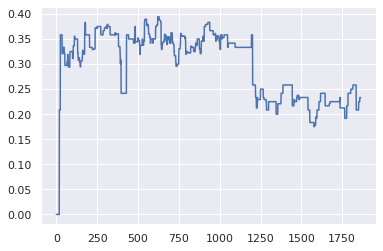

In [31]:
plt.plot(L1_24_32['DD697EA75B68'])

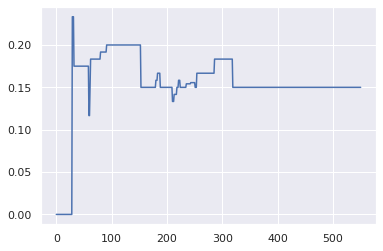

In [32]:
plt.plot(test_imputed[test_imputed['location'] == 'T1_1']['DD697EA75B68'])

In [33]:
pairs = [('V1_24', 'V1_32'), ('V1_22', 'V1_30'), ('V1_21', 'V1_29'), ('V1_20', 'V1_28'), ('V1_19', 'V1_27'), ('V1_18', 'V1_26')]

generated_data = []
for A, B in pairs:
    generated_data.append(generate_between(train_imputed, A, B))

In [34]:
generated_data.append(train_imputed)

In [35]:
train_augmented = pd.concat(generated_data, sort=False)

In [36]:
train_augmented

C400A2E19293  CD4533FFC0E1  D2B6503554D7  DB8B36A69C56  DD697EA75B68  \
0          0.000000      0.000000      0.000000      0.000000      0.000000   
1          0.000000      0.000000      0.000000      0.000000      0.000000   
2          0.000000      0.000000      0.000000      0.000000      0.000000   
3          0.000000      0.000000      0.000000      0.000000      0.000000   
4          0.000000      0.000000      0.000000      0.000000      0.000000   
...             ...           ...           ...           ...           ...   
39725      0.433333      0.283333      0.366667      0.606667      0.483333   
39726      0.433333      0.283333      0.366667      0.606667      0.483333   
39727      0.433333      0.283333      0.366667      0.606667      0.483333   
39728      0.433333      0.283333      0.366667      0.606667      0.483333   
39729      0.433333      0.283333      0.366667      0.606667      0.483333   

       DF231643E227  E13B805C6CB0  E43355CA8B96  E6D9D20DD197  E8FD0B453DC4  \
0          0.000000      0.000000      0.033333      0.000000      0.000000   
1          0.000000      0.000000      0.033333      0.383333      0.000000   
2          0.000000      0.000000      0.033333      0.616667      0.000000   
3          0.000000      0.000000      0.033333      0.612500      0.000000   
4          0.000000      0.000000      0.033333      0.612500      0.000000   
...             ...           ...           ...           ...           ...   
39725      0.216667      0.233333      0.622222      0.216667      0.183333   
39726      0.216667      0.233333      0.622222      0.216667      0.183333   
39727      0.216667      0.233333      0.622222      0.216667      0.183333   
39728      0.216667      0.233333      0.620833      0.216667      0.183333   
39729      0.216667      0.233333      0.620833      0.216667      0.183333   

       ...  EC72840D9AD3  F1307ECB3B90  F1EDAF28E08A  F69A86823B96  \
0      ...      0.000000      0.000000      0.033333           0.0   
1      ...      0.000000      0.150000      0.033333           0.0   
2      ...      0.000000      0.150000      0.033333           0.0   
3      ...      0.000000      0.162500      0.033333           0.0   
4      ...      0.000000      0.162500      0.041667           0.0   
...    ...           ...           ...           ...           ...   
39725  ...      0.558333      0.400000      0.475000           0.4   
39726  ...      0.558333      0.400000      0.475000           0.4   
39727  ...      0.558333      0.422222      0.475000           0.4   
39728  ...      0.558333      0.422222      0.475000           0.4   
39729  ...      0.561111      0.422222      0.475000           0.4   

       FB2EE01C18CE  FDAE5980F28C         X        Y  location  level_1  
0          0.000000      0.000000  29.64190  9.72901       NaN      NaN  
1          0.000000      0.000000  29.64190  9.72901       NaN      NaN  
2          0.000000      0.000000  29.64190  9.72901       NaN      NaN  
3          0.000000      0.000000  29.64190  9.72901       NaN      NaN  
4          0.266667      0.000000  29.64190  9.72901       NaN      NaN  
...             ...           ...       ...      ...       ...      ...  
39725      0.133333      0.416667   8.17867  5.28213      V1_9  43166.0  
39726      0.125000      0.416667   8.17867  5.28213      V1_9  43167.0  
39727      0.125000      0.416667   8.17867  5.28213      V1_9  43168.0  
39728      0.125000      0.416667   8.17867  5.28213      V1_9  43169.0  
39729      0.125000      0.416667   8.17867  5.28213      V1_9  43170.0  

[50190 rows x 21 columns]

In [37]:
X_train, y_train = train_augmented[scanners].values, train_augmented[["X", "Y"]].values
X_validation, y_validation = validation_imputed[scanners].values, validation_imputed[["X", "Y"]].values
X_test, y_test = test_imputed[scanners].values, test_imputed[["X", "Y"]].values

In [38]:
model = MLPRegressor(model_type='special')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1152      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 5,442
Trainable params: 5,442
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = model.fit(X_train, y_train, X_test, y_test)

Train on 50190 samples, validate on 8458 samples
Epoch 1/1000
50190/50190 [==============================] - 2s 44us/sample - loss: 8.3077 - mae: 1.5318 - mse: 7.6897 - val_loss: 3.8344 - val_mae: 1.4047 - val_mse: 3.1894
Epoch 2/1000
50190/50190 [==============================] - 1s 26us/sample - loss: 1.7945 - mae: 0.8037 - mse: 1.1663 - val_loss: 3.6551 - val_mae: 1.3838 - val_mse: 3.0398
Epoch 3/1000
50190/50190 [==============================] - 2s 31us/sample - loss: 1.5803 - mae: 0.7265 - mse: 0.9627 - val_loss: 3.3260 - val_mae: 1.3167 - val_mse: 2.7191
Epoch 4/1000
50190/50190 [==============================] - 2s 33us/sample - loss: 1.4195 - mae: 0.6637 - mse: 0.8089 - val_loss: 3.4791 - val_mae: 1.3077 - val_mse: 2.8328
Epoch 5/1000
50190/50190 [==============================] - 1s 30us/sample - loss: 1.3084 - mae: 0.6154 - mse: 0.7027 - val_loss: 3.1652 - val_mae: 1.2525 - val_mse: 2.5581
Epoch 6/1000
50190/50190 [==============================] - 1s 30us/sample - loss: 1.2

Epoch 48/1000
50190/50190 [==============================] - 2s 30us/sample - loss: 0.7347 - mae: 0.3020 - mse: 0.1915 - val_loss: 2.7367 - val_mae: 1.1460 - val_mse: 2.2089
Epoch 49/1000
50190/50190 [==============================] - 1s 29us/sample - loss: 0.7336 - mae: 0.3005 - mse: 0.1912 - val_loss: 2.6990 - val_mae: 1.1335 - val_mse: 2.1486
Epoch 50/1000
50190/50190 [==============================] - 1s 29us/sample - loss: 0.7309 - mae: 0.2986 - mse: 0.1890 - val_loss: 2.5617 - val_mae: 1.0888 - val_mse: 2.0062
Epoch 51/1000
50190/50190 [==============================] - 1s 29us/sample - loss: 0.7289 - mae: 0.2980 - mse: 0.1878 - val_loss: 2.5868 - val_mae: 1.0952 - val_mse: 2.0413
Epoch 52/1000
50190/50190 [==============================] - 1s 29us/sample - loss: 0.7273 - mae: 0.2968 - mse: 0.1867 - val_loss: 2.5822 - val_mae: 1.0942 - val_mse: 2.0410
Epoch 53/1000
50190/50190 [==============================] - 1s 29us/sample - loss: 0.7247 - mae: 0.2954 - mse: 0.1846 - val_loss:

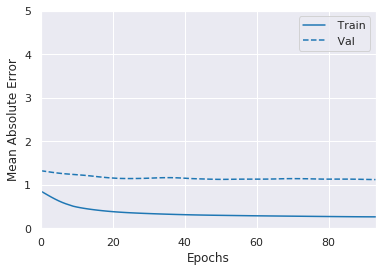

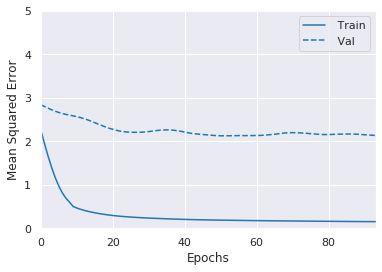

In [40]:
model.show_history()

## Model Validation

9933/1 - 0s - loss: 0.6429 - mae: 0.3970 - mse: 0.5697
Validation loss: 1.090994416260232
Mean absolute error: 0.39702383
Mean squared error: 0.5696996
Average distance error: 0.6258135711863719


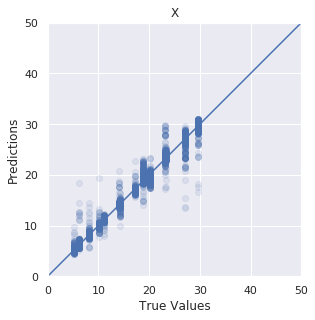

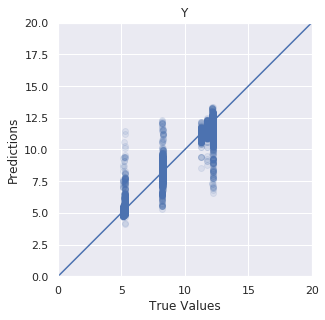

In [41]:
model.model_validation(X_validation, y_validation)

## Model Testing

8458/1 - 0s - loss: 3.9837 - mae: 1.0914 - mse: 2.0646
Test loss: 2.592885852677514
Mean absolute error: 1.0913997
Mean squared error: 2.0645578
Average distance error: 1.7822911499539014


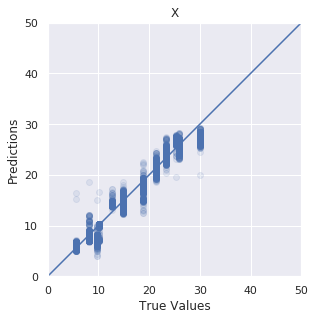

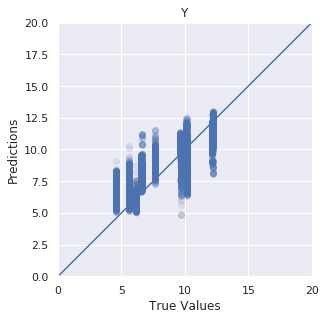

In [42]:
model.model_testing(X_test, y_test)

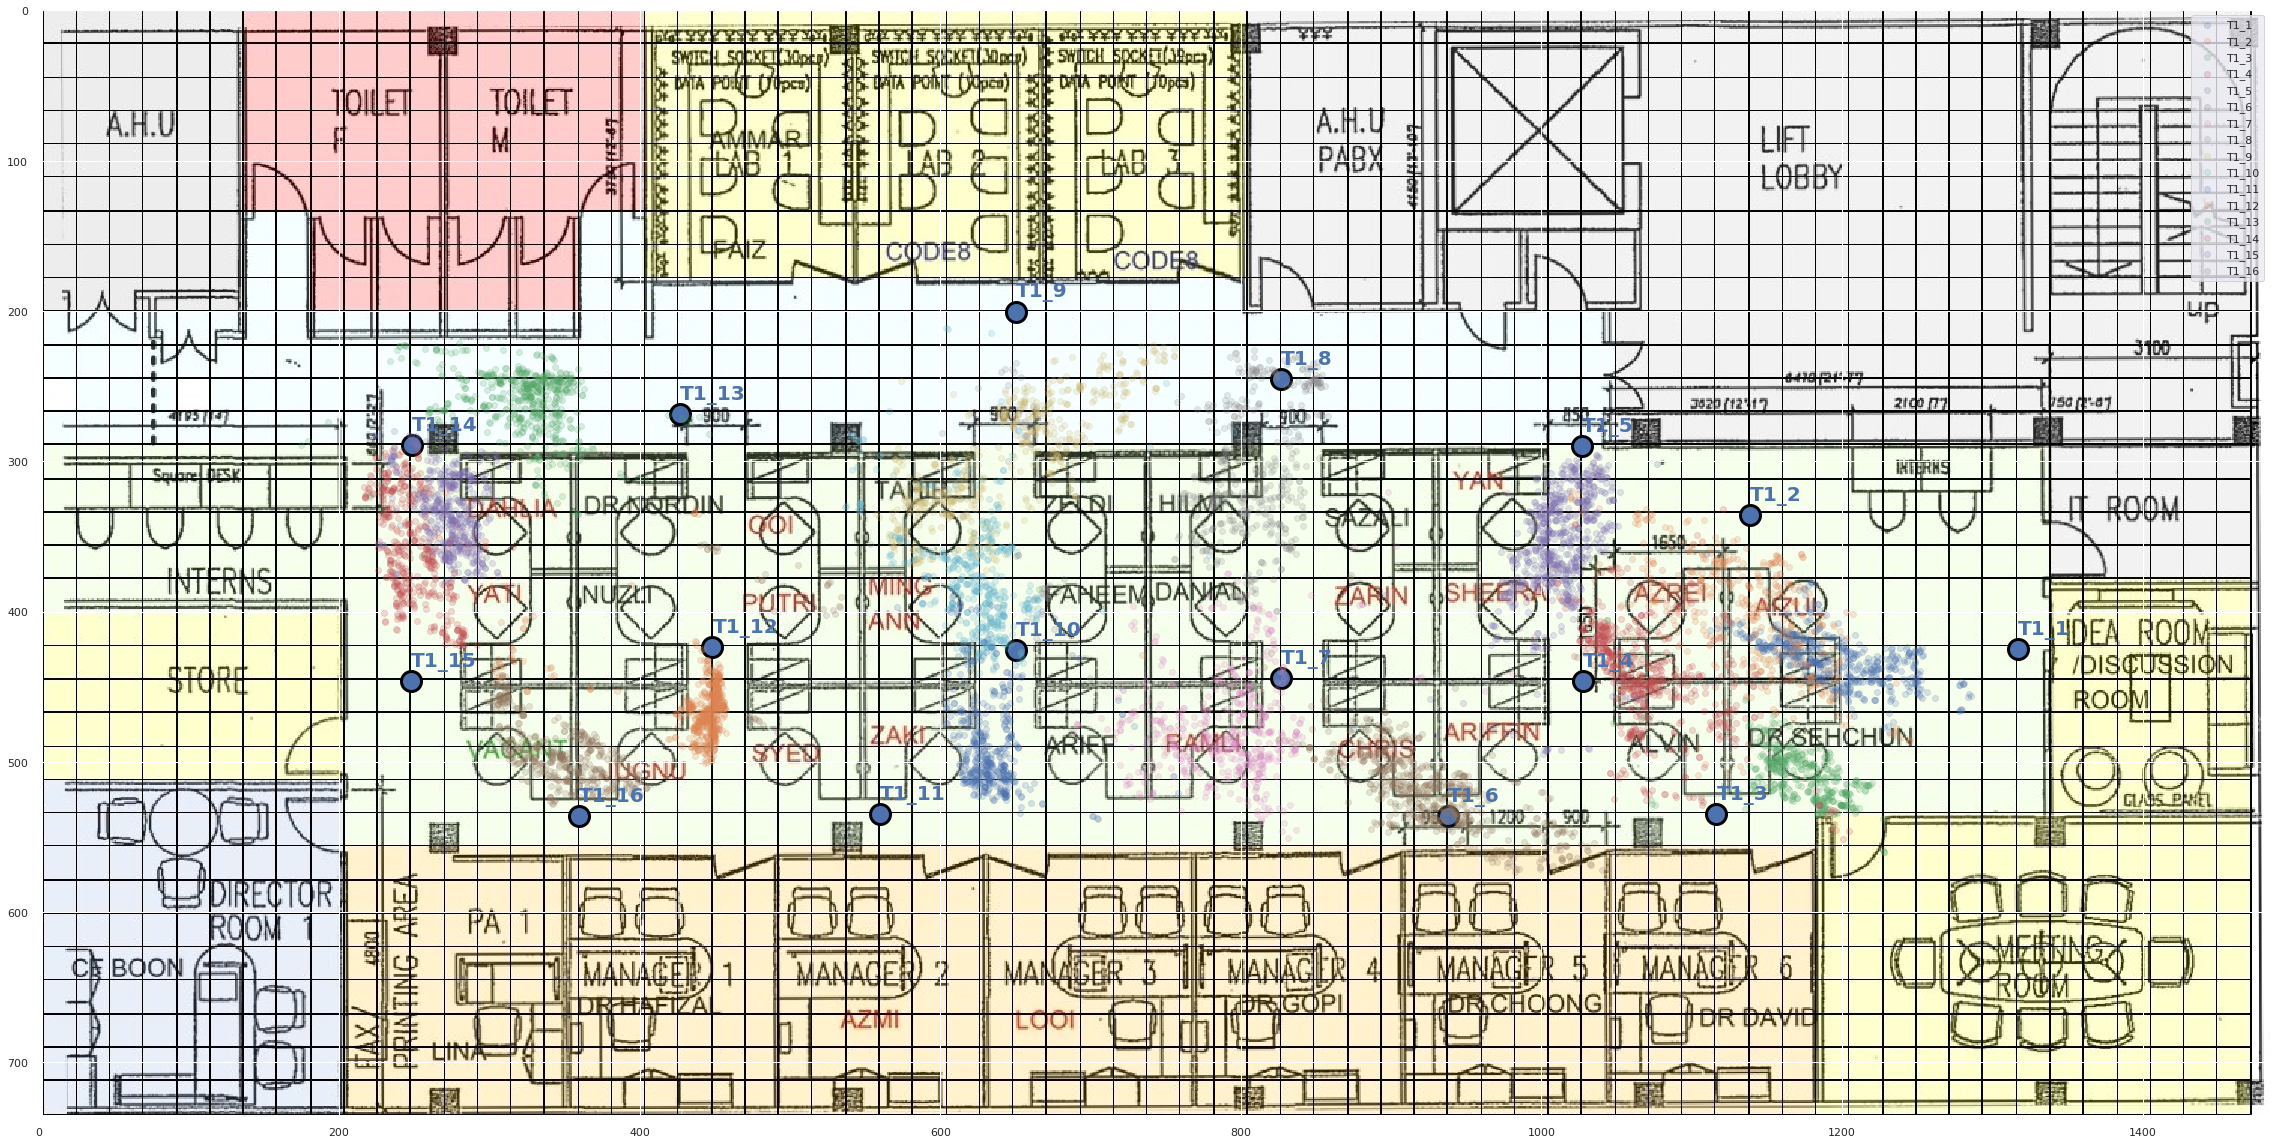

In [43]:
img =  mpimg.imread('../Map/main.png')
fingerprint_color = "r"
testdata_color = "b"
plt.figure(figsize=(40,40))
plt.imshow(img)

labels = ["V1_23", "V1_24", "V1_32", "V1_22", "V1_14", "V1_13", "V1_12", "V1_21", "V1_29", "V1_30", "V1_31", "V1_11", "V1_20", "V1_28", "V1_10", "V1_19", "V1_27", "V1_9", "V1_8", "V1_18", "V1_26"]
x = [27.151600, 29.594400, 29.689400, 23.153700, 23.169100, 20.171700, 17.173201, 18.712299, 18.691700, 23.244200, 27.133301, 14.063600, 14.159800, 14.250300, 11.176600, 10.162500, 10.141900, 8.178670, 5.180690, 6.164600, 6.255650]
y = [8.159480, 8.172020, 11.286000, 8.250140, 5.247920, 5.121330, 5.217130, 8.227330, 12.230300, 12.253700, 11.717700, 5.312350, 8.203950, 12.207500, 5.297530, 8.183420, 12.186400, 5.282130, 5.266730, 8.274090, 12.166400]
x = np.array(x) * 44
y = np.array(y) * 44

testLabels = ["T1_1", "T1_2", "T1_3", "T1_4", "T1_5", "T1_6", "T1_7", "T1_8", "T1_9", "T1_10", "T1_11", "T1_12", "T1_13", "T1_14", "T1_15", "T1_16"]
testX = [29.934250, 25.877805, 25.372470, 23.355726, 23.333564, 21.316819, 18.790348, 18.790348, 14.779021, 14.779021, 12.717952, 10.191480, 9.703916, 5.648265, 5.626103, 8.174736]
testY = [9.659024, 7.630801, 12.155781, 10.139037, 6.593112, 12.177943, 10.094712, 5.573659, 4.554205, 9.673634, 12.155781, 9.629310, 6.105547, 6.570950, 10.139037, 12.177943]
testX = np.array(testX) * 44
testY = np.array(testY) * 44

# plt.scatter(x, y, s=400, c=fingerprint_color, edgecolors="black", linewidths=3)
plt.scatter(testX, testY, s=400, c=testdata_color, edgecolors="black", linewidths=3)

# for i in range(len(labels)):
#     plt.annotate(labels[i], (x[i], y[i] - 10), fontsize=20, color=fingerprint_color, weight='bold')

for j in range(len(testLabels)):
    plt.annotate(testLabels[j], (testX[j], testY[j] - 10), fontsize=20, color=testdata_color, weight='bold')

for i in range(len(testLabels)):
    loc = testLabels[i]
    test_loc = test_imputed[test_imputed['location'] == loc]
    X_loc = test_loc[scanners].values
    locs = model.predict(X_loc) * 44
    plt.scatter(locs[:, 0], locs[:, 1], alpha=0.2, label=testLabels[i])
plt.legend()